In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pylab as plt
import cv2
import PIL.Image as Image
import os

In [2]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224,224,3))
])

In [3]:
import pandas as pd

image_labels = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt", 
            header=None).to_numpy()
image_labels

array([['background'],
       ['tench'],
       ['goldfish'],
       ...,
       ['bolete'],
       ['ear'],
       ['toilet tissue']], dtype=object)

In [4]:
image_labels.shape

(1001, 1)

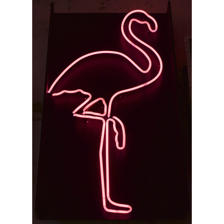

In [5]:
flamingo = Image.open("./dataset/Flamingo.jpg").resize((224,224))
flamingo

In [6]:
flamingo = np.array(flamingo)/255.0
flamingo.shape, flamingo

((224, 224, 3),
 array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]))

In [7]:
flamingo[np.newaxis].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(flamingo[np.newaxis])

1/1 [==============================] - 3s 3s/step


In [9]:
pred_label = np.argmax(result)
pred_label

601

In [10]:
image_labels[pred_label]

array(['hook'], dtype=object)

In [11]:
result[0][pred_label]

7.420096

In [12]:
c=0
for i in image_labels:
    c += 1
    if i =="flamingo":
        print(c-1)
        break

131


In [13]:
result[0][131]

0.1620034

In [14]:
flamingo2 = Image.open("./dataset/Flamingo2.jpg").resize((224,224))
flamingo2 = np.array(flamingo2)/255.0
result = classifier.predict(flamingo2[np.newaxis, ...])
pred_label = np.argmax(result)
image_labels[pred_label]

1/1 [==============================] - 0s 31ms/step


array(['flamingo'], dtype=object)

In [15]:
result[0][pred_label]

8.151034

In [16]:
result[0][131]

8.151034

In [20]:
import gc
gc.collect()

0

# Flower Dataset

In [21]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [22]:
data_dir

'.\\datasets\\flower_photos'

In [23]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [24]:
list(data_dir.glob('*/*.jpg'))[:3]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg')]

In [25]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [26]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

del X
del y

In [29]:
X_train_scaled[0].shape

(180, 180, 3)

In [30]:
X_train_scaled.shape, X_test_scaled.shape

((2752, 180, 180, 3), (918, 180, 180, 3))

In [34]:
import gc

gc.collect()

987

In [33]:
del X_train_resized

In [35]:
new_size = (224, 224)

X_train_resized = np.empty((X_train_scaled.shape[0], *new_size, 3), dtype=np.float32)

for i in range(X_train_scaled.shape[0]):
    X_train_resized[i] = cv2.resize(X_train_scaled[i], new_size).astype(np.float32)

In [36]:
X_test_resized = np.empty((X_test_scaled.shape[0], *new_size, 3), dtype=np.float32)
for i in range(X_test_scaled.shape[0]):
    X_test_resized[i] = cv2.resize(X_test_scaled[i], new_size).astype(np.float32)

In [37]:
del X_train_scaled, X_test_scaled
gc.collect()

0

In [39]:
X_train_resized.shape

(2752, 224, 224, 3)

In [42]:
result = classifier.predict(X_train_resized[:5])

1/1 [==============================] - 1s 512ms/step


In [44]:
y_predicted = [np.argmax(i) for i in result]
y_predicted

[947, 913, 920, 947, 986]

In [57]:
image_labels[y_predicted]

array(['cardoon'], dtype=object)

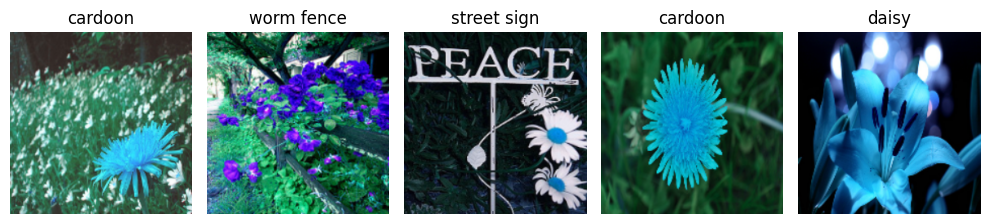

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

# Görüntüleri ve etiketleri alt çizimlere ekleyin
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_resized[i])
    ax.set_title(image_labels[y_predicted][i][0])
    ax.axis('off')

plt.tight_layout()
plt.show()

# Now take pre-trained model and retrain it using flowers images

In [65]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [75]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [77]:
gc.collect()

14410

In [78]:
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=['accuracy'])

model.fit(X_train_resized, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 4s 36ms/step - loss: 0.8680 - accuracy: 0.6722
Epoch 2/5
86/86 [==============================] - 3s 36ms/step - loss: 0.4437 - accuracy: 0.8416
Epoch 3/5
86/86 [==============================] - 3s 36ms/step - loss: 0.3549 - accuracy: 0.8794
Epoch 4/5
86/86 [==============================] - 3s 36ms/step - loss: 0.2971 - accuracy: 0.9033
Epoch 5/5
86/86 [==============================] - 3s 36ms/step - loss: 0.2551 - accuracy: 0.9197


In [79]:
model.evaluate(X_test_resized,y_test)

29/29 [==============================] - 2s 36ms/step - loss: 0.4040 - accuracy: 0.8584


[0.40397998690605164, 0.85838782787323]

29/29 [==============================] - 2s 34ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.86       176
           1       0.78      0.90      0.84       154
           2       0.94      0.84      0.89       226
           3       0.79      0.89      0.84       150
           4       0.87      0.85      0.86       212

    accuracy                           0.86       918
   macro avg       0.86      0.86      0.86       918
weighted avg       0.86      0.86      0.86       918



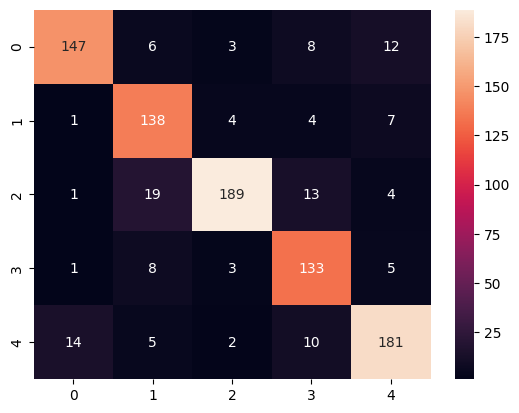

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test_resized)
y_predicted = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d")

print(classification_report(y_test,y_predicted))